# Import required libraries
#This programe is create by Sujit Mandal

Github: https://github.com/sujitmandal

LinkedIn : https://www.linkedin.com/in/sujit-mandal-91215013a/

Facebook : https://www.facebook.com/sujit.mandal.33671748

Twitter : https://twitter.com/mandalsujit37

In [2]:
#Import required libraries
import os 
import cv2 
import numpy as np 
from tqdm import tqdm
import tensorflow as tf
from random import shuffle 
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

# Read The Dataset

In [3]:
#Read The Dataset
train_images = np.load('Dataset/64/train_images.npy')
train_labels = np.load('Dataset/64/train_labels.npy')
test_images = np.load('Dataset/64/test_images.npy')
test_labels = np.load('Dataset/64/test_labels.npy')

In [4]:
print(train_images.shape) 
print(train_labels.shape) 
print(test_images.shape)  
print(test_labels.shape) 

(2930, 64, 64, 3)
(2930, 1)
(624, 64, 64, 3)
(624, 1)


# Enter The Image Size [32, 64, 128]

In [5]:
image_size = 64
#image_size = int(input('Enter The Image Size [32, 64, 128] :'))

# Normalized 

In [6]:
#Normalized
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convolutional Neural Network(CNN) building

In [7]:
#Convolutional Neural Network(CNN) building
EPOCHS = 20

def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))
    
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
        
    return model
        
model = build_model()

In [8]:
ch_path = ('save/64/cp.ckpt')
cp_dir = os.path.dirname(ch_path)

In [8]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(ch_path,
                                                 save_weights_only = True,
                                                 verbose = 1)
model = build_model()

# Train the model

In [9]:
#Train the model
history = model.fit(train_images, train_labels, epochs=EPOCHS, 
                    validation_data=(test_images, test_labels), callbacks = [cp_callback])

Epoch 1/20
92/92 [==============================] - ETA: 0s - loss: 0.4452 - accuracy: 0.7922
Epoch 00001: saving model to save/64/cp.ckpt
92/92 [==============================] - 14s 155ms/step - loss: 0.4452 - accuracy: 0.7922 - val_loss: 0.4425 - val_accuracy: 0.7949
Epoch 2/20
92/92 [==============================] - ETA: 0s - loss: 0.1609 - accuracy: 0.9379
Epoch 00002: saving model to save/64/cp.ckpt
92/92 [==============================] - 15s 162ms/step - loss: 0.1609 - accuracy: 0.9379 - val_loss: 0.3881 - val_accuracy: 0.8301
Epoch 3/20
92/92 [==============================] - ETA: 0s - loss: 0.1227 - accuracy: 0.9529
Epoch 00003: saving model to save/64/cp.ckpt
92/92 [==============================] - 20s 221ms/step - loss: 0.1227 - accuracy: 0.9529 - val_loss: 0.7926 - val_accuracy: 0.7276
Epoch 4/20
92/92 [==============================] - ETA: 0s - loss: 0.1031 - accuracy: 0.9601
Epoch 00004: saving model to save/64/cp.ckpt
92/92 [==============================] - 16s 178

# Plot The Model 

20/20 - 1s - loss: 1.1139 - accuracy: 0.8349
Accuracy: 83.49%


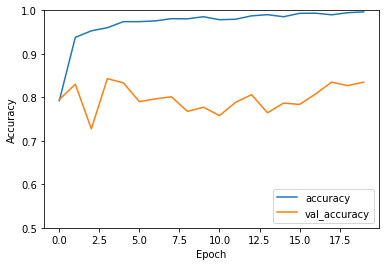

In [10]:
#Plot The Model 
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Accuracy: {:5.2f}%'.format(100*test_acc))

In [11]:
model = build_model()
loss, acc = model.evaluate(test_images, test_labels)
print('restored model, accuracy: {:5.2f}%'.format(100*acc))

20/20 [==============================] - 1s 72ms/step - loss: 2.2688 - accuracy: 0.0048
restored model, accuracy:  0.48%


In [12]:
model.load_weights(ch_path)
loss, acc = model.evaluate(test_images, test_labels)
print('restored model, accuracy: {:5.2f}%'.format(100*acc))

20/20 [==============================] - 1s 67ms/step - loss: 1.1139 - accuracy: 0.8349
restored model, accuracy: 83.49%


In [13]:
ch_path_2 = ('save/64/cp-{epoch:04d}.ckpt')
cp_dir_2 = os.path.dirname(ch_path_2)

In [14]:
cp_callback_2 = tf.keras.callbacks.ModelCheckpoint(ch_path_2, 
                                                   save_weights_only =  True, 
                                                   verbose = 1,
                                                   period = 5)

In [15]:
model = build_model()
#Train the model
history_2 = model.fit(train_images, train_labels, 
                          epochs=EPOCHS, 
                      validation_data=(test_images, test_labels), 
                      callbacks = [cp_callback_2],
                      verbose = 0
                       )


Epoch 00005: saving model to save/64/cp-0005.ckpt

Epoch 00010: saving model to save/64/cp-0010.ckpt

Epoch 00015: saving model to save/64/cp-0015.ckpt

Epoch 00020: saving model to save/64/cp-0020.ckpt


In [16]:
latest_model = tf.train.latest_checkpoint(cp_dir_2)
latest_model

'save/64/cp-0020.ckpt'

# save and restore

In [17]:
#save
model.save_weights('./save/64/my_save')
#restore
model = build_model()
model.load_weights('./save/64/my_save')

loss, acc = model.evaluate(test_images, test_labels)
print('restored model, accuracy: {:5.2f}%'.format(100*acc))

20/20 [==============================] - 1s 50ms/step - loss: 1.7389 - accuracy: 0.8125
restored model, accuracy: 81.25%


# save entire model to a HDF5 file

In [18]:
model = build_model()

model.fit(train_images, train_labels, epochs=15)

#save entire model to a HDF5 file
model.save('saved model/64/my_model.h5')

Epoch 1/15
92/92 [==============================] - 16s 169ms/step - loss: 0.5020 - accuracy: 0.7512
Epoch 2/15
92/92 [==============================] - 15s 162ms/step - loss: 0.1826 - accuracy: 0.9283
Epoch 3/15
92/92 [==============================] - 15s 158ms/step - loss: 0.1439 - accuracy: 0.9444
Epoch 4/15
92/92 [==============================] - 15s 161ms/step - loss: 0.1117 - accuracy: 0.9553
Epoch 5/15
92/92 [==============================] - 15s 160ms/step - loss: 0.0833 - accuracy: 0.9669
Epoch 6/15
92/92 [==============================] - 15s 161ms/step - loss: 0.0766 - accuracy: 0.9683
Epoch 7/15
92/92 [==============================] - 15s 161ms/step - loss: 0.0740 - accuracy: 0.9737
Epoch 8/15
92/92 [==============================] - 15s 162ms/step - loss: 0.0632 - accuracy: 0.9754
Epoch 9/15
92/92 [==============================] - 15s 161ms/step - loss: 0.0657 - accuracy: 0.9730
Epoch 10/15
92/92 [==============================] - 15s 159ms/step - loss: 0.0529 - accura

# Load model

In [19]:
#Load model
new_model = keras.models.load_model('saved model/64/my_model.h5')
new_model.summary()

loss, acc = new_model.evaluate(test_images, test_labels)
print('restored model, accuracy: {:5.2f}%'.format(100*acc))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

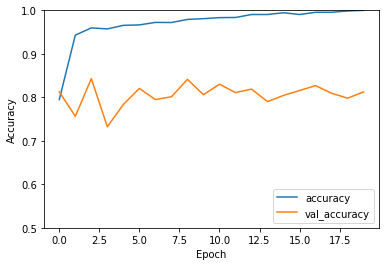

In [20]:
#plot
plt.plot(history_2.history['accuracy'], label='accuracy')
plt.plot(history_2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Final Model Accuracy

In [21]:
test_loss, test_acc = new_model.evaluate(test_images,  test_labels, verbose=2)
print('Final Model, accuracy: {:5.2f}%'.format(100*test_acc))

20/20 - 1s - loss: 0.6514 - accuracy: 0.8269
Final Model, accuracy: 82.69%
